2025-11-10 02:41:26.465180: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-10 02:41:26.994619: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-10 02:41:29.469597: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-10 02:41:34.105888: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
2025-11-10 02:41:34.283025: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/10
908/938 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5855 - loss: 1.4433

2025-11-10 02:41:36.553073: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 31360000 exceeds 10% of free system memory.


938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7660 - loss: 0.9013 - val_accuracy: 0.8925 - val_loss: 0.4049
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8974 - loss: 0.3684 - val_accuracy: 0.9107 - val_loss: 0.3126
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9132 - loss: 0.3059 - val_accuracy: 0.9238 - val_loss: 0.2748
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9225 - loss: 0.2707 - val_accuracy: 0.9306 - val_loss: 0.2471
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9299 - loss: 0.2450 - val_accuracy: 0.9356 - val_loss: 0.2253
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9363 - loss: 0.2246 - val_accuracy: 0.9373 - val_loss: 0.2119
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9405 - loss: 0.2076 - val_accuracy: 0.9425 - val_loss: 0.1955
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9447 - loss: 0.1934 - val_accuracy: 0.9441 - val_

2025-11-10 02:41:52.514508: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 31360000 exceeds 10% of free system memory.


313/313 - 0s - 1ms/step - accuracy: 0.9511 - loss: 0.1644

✅ Test Accuracy: 0.9511
✅ Test Loss: 0.1644


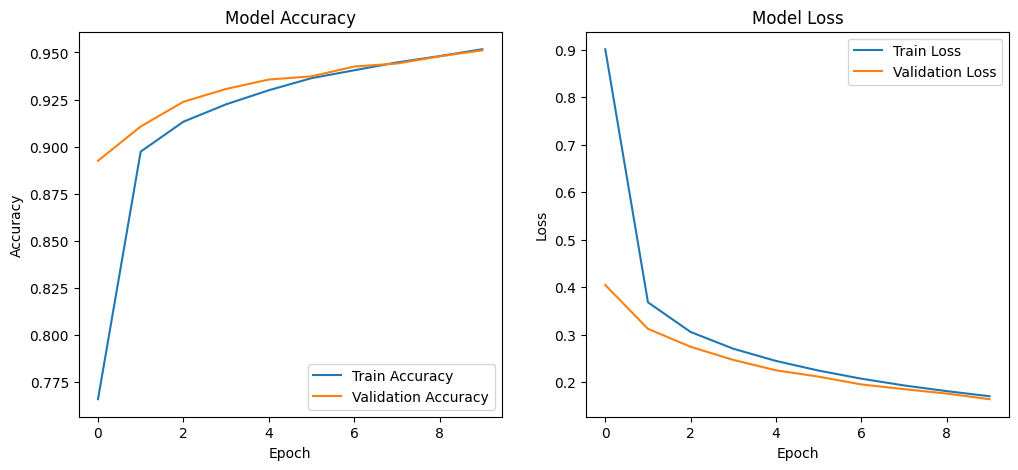

In [1]:
# ==============================
# Feedforward Neural Network with Keras & TensorFlow (MNIST)
# ==============================

# a. Import necessary packages
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import pandas as pd

# b. Load the training and testing data (MNIST)



train_path = "/home/ayush/Desktop/lp4/dataset/mnist_train.csv"
test_path = "/home/ayush/Desktop/lp4/dataset/mnist_test.csv"

# Read CSV files
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Split into features (X) and labels (y)
y_train = train_df.iloc[:, 0].values
x_train = train_df.iloc[:, 1:].values

y_test = test_df.iloc[:, 0].values
x_test = test_df.iloc[:, 1:].values



# Normalize the pixel values (0–255 → 0–1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# c. Define the network architecture using Keras
model = Sequential([
    #Flatten(input_shape=(28, 28)),     # Flatten 28x28 image to 784 vector
    Dense(128, activation='relu'),     # Hidden layer with 128 neurons
    Dense(64, activation='relu'),      # Hidden layer with 64 neurons
    Dense(10, activation='softmax')    # Output layer (10 classes)
])

# d. Compile and train the model using SGD optimizer
model.compile(
    optimizer=SGD(learning_rate=0.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_test, y_test)
)

# e. Evaluate the network
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")
print(f"✅ Test Loss: {test_loss:.4f}")

# f. Plot the training loss and accuracy
plt.figure(figsize=(12,5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()




#Implementing Feedforward neural networks with Keras and TensorFlow for
#classification of hand-written MNIST dataset using below steps:
#a. Import the necessary packages
#b. Load the training and testing data
#c. Define the network architecture using Keras
#d. Train the model using SGD with 11 epochs
#e. Evaluate the network
#f. Plot the training loss and accuracy
